In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cancellations = pd.read_csv('Client_Cancellations.csv')
bookings = pd.read_csv('Future_Bookings_All_Clients.csv')

In [3]:
cancellations.head()

,Cancel Date,Code,Service,Staff,Booking Date,Canceled By,Days
0,05/22/2018,MASA01,CFC,JOANNE,05/24/2018,ADMIN,2.0
1,06/27/2018,MASA01,CBAL,KELLY,06/27/2018,ADMIN,0.0
2,07/03/2018,MASA01,SHCM,BECKY,07/10/2018,BECKY,7.0
3,07/10/2018,MASA01,SHCC,JJ,07/11/2018,KELLY,1.0
4,07/24/2018,TRUA01,SHCM,KELLY,07/24/2018,TANYA,0.0


In [4]:
cancellations.tail()

,Cancel Date,Code,Service,Staff,Booking Date,Canceled By,Days
238,05/06/2018,ROUT01,SBD,JJ,05/06/2018,JJ,0.0
239,06/07/2018,ALCV01,CFC,KELLY,06/07/2018,KELLY,0.0
240,06/26/2018,FISV01,CFC,JOANNE,06/30/2018,JJ,4.0
241,05/04/2018,MCGV01,SBD,BECKY,05/04/2018,JJ,0.0
242,05/18/2018,MIRY01,CDPB,JOANNE,05/19/2018,JOANNE,1.0


In [5]:
bookings.head()

,Code,Staff,Service,Date,Time,TimeInt
0,JUNJ01,JJ,CON,03/14/2018,3:50:00 PM,950
1,NORJ01,JJ,SHCM,03/14/2018,4:00:00 PM,960
2,CORS01,JJ,SHCW,03/15/2018,2:10:00 PM,850
3,KERT01,JJ,SHCW,03/15/2018,10:00:00 AM,600
4,LEHJ01,JJ,SHCM,03/15/2018,6:00:00 PM,1080


In [6]:
bookings.tail()

,Code,Staff,Service,Date,Time,TimeInt
1901,KOOM01,JJ,SHCW,11/23/2018,11:00:00 AM,660
1902,SLUS01,JJ,SHCM,12/05/2018,11:10:00 AM,670
1903,CHEW01,JJ,SHCW,12/21/2018,10:00:00 AM,600
1904,KOOM01,JJ,SHCW,01/04/2019,11:00:00 AM,660
1905,KOOM01,JJ,SHCW,02/15/2019,11:00:00 AM,660


In [7]:
bookings = bookings.rename(columns={'Date': 'Booking Date'})
bookings.columns

Index(['Code', 'Staff', 'Service', 'Booking Date', 'Time', 'TimeInt'], dtype='object')

In [8]:
all_bookings = pd.concat([cancellations, bookings])

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [9]:
all_bookings.head()

,Booking Date,Cancel Date,Canceled By,Code,Days,Service,Staff,Time,TimeInt
0,05/24/2018,05/22/2018,ADMIN,MASA01,2.0,CFC,JOANNE,NaN,NaN
1,06/27/2018,06/27/2018,ADMIN,MASA01,0.0,CBAL,KELLY,NaN,NaN
2,07/10/2018,07/03/2018,BECKY,MASA01,7.0,SHCM,BECKY,NaN,NaN
3,07/11/2018,07/10/2018,KELLY,MASA01,1.0,SHCC,JJ,NaN,NaN
4,07/24/2018,07/24/2018,TANYA,TRUA01,0.0,SHCM,KELLY,NaN,NaN


In [10]:
all_bookings.tail()

,Booking Date,Cancel Date,Canceled By,Code,Days,Service,Staff,Time,TimeInt
1901,11/23/2018,NaN,NaN,KOOM01,NaN,SHCW,JJ,11:00:00 AM,660.0
1902,12/05/2018,NaN,NaN,SLUS01,NaN,SHCM,JJ,11:10:00 AM,670.0
1903,12/21/2018,NaN,NaN,CHEW01,NaN,SHCW,JJ,10:00:00 AM,600.0
1904,01/04/2019,NaN,NaN,KOOM01,NaN,SHCW,JJ,11:00:00 AM,660.0
1905,02/15/2019,NaN,NaN,KOOM01,NaN,SHCW,JJ,11:00:00 AM,660.0


In [11]:
all_bookings.iloc[240:250, :]

,Booking Date,Cancel Date,Canceled By,Code,Days,Service,Staff,Time,TimeInt
240,06/30/2018,06/26/2018,JJ,FISV01,4.0,CFC,JOANNE,NaN,NaN
241,05/04/2018,05/04/2018,JJ,MCGV01,0.0,SBD,BECKY,NaN,NaN
242,05/19/2018,05/18/2018,JOANNE,MIRY01,1.0,CDPB,JOANNE,NaN,NaN
0,03/14/2018,NaN,NaN,JUNJ01,NaN,CON,JJ,3:50:00 PM,950.0
1,03/14/2018,NaN,NaN,NORJ01,NaN,SHCM,JJ,4:00:00 PM,960.0
2,03/15/2018,NaN,NaN,CORS01,NaN,SHCW,JJ,2:10:00 PM,850.0
3,03/15/2018,NaN,NaN,KERT01,NaN,SHCW,JJ,10:00:00 AM,600.0
4,03/15/2018,NaN,NaN,LEHJ01,NaN,SHCM,JJ,6:00:00 PM,1080.0
5,03/15/2018,NaN,NaN,SCHJ01,NaN,SHCM,JJ,12:00:00 PM,720.0
6,03/15/2018,NaN,NaN,SCHJ01,NaN,CCAMO,JJ,12:50:00 PM,770.0


In [12]:
all_bookings = all_bookings.reset_index(drop=True)

In [13]:
all_bookings.tail()

,Booking Date,Cancel Date,Canceled By,Code,Days,Service,Staff,Time,TimeInt
2144,11/23/2018,NaN,NaN,KOOM01,NaN,SHCW,JJ,11:00:00 AM,660.0
2145,12/05/2018,NaN,NaN,SLUS01,NaN,SHCM,JJ,11:10:00 AM,670.0
2146,12/21/2018,NaN,NaN,CHEW01,NaN,SHCW,JJ,10:00:00 AM,600.0
2147,01/04/2019,NaN,NaN,KOOM01,NaN,SHCW,JJ,11:00:00 AM,660.0
2148,02/15/2019,NaN,NaN,KOOM01,NaN,SHCW,JJ,11:00:00 AM,660.0


In [14]:
column_names = all_bookings.columns
column_names

Index(['Booking Date', 'Cancel Date', 'Canceled By', 'Code', 'Days', 'Service',
       'Staff', 'Time', 'TimeInt'],
      dtype='object')

In [15]:
column_names = ['booking_date', 'cancel_date', 'canceled_by', 'code', 'days', 'service', 'staff', 'time', 'time_int']

In [16]:
column_names

['booking_date',
 'cancel_date',
 'canceled_by',
 'code',
 'days',
 'service',
 'staff',
 'time',
 'time_int']

In [17]:
all_bookings.columns = column_names

In [18]:
all_bookings.head()

,booking_date,cancel_date,canceled_by,code,days,service,staff,time,time_int
0,05/24/2018,05/22/2018,ADMIN,MASA01,2.0,CFC,JOANNE,NaN,NaN
1,06/27/2018,06/27/2018,ADMIN,MASA01,0.0,CBAL,KELLY,NaN,NaN
2,07/10/2018,07/03/2018,BECKY,MASA01,7.0,SHCM,BECKY,NaN,NaN
3,07/11/2018,07/10/2018,KELLY,MASA01,1.0,SHCC,JJ,NaN,NaN
4,07/24/2018,07/24/2018,TANYA,TRUA01,0.0,SHCM,KELLY,NaN,NaN


In [19]:
type(all_bookings.booking_date[3])

str

In [20]:
all_bookings.loc[:,['booking_date', 'cancel_date']] = all_bookings.loc[:,['booking_date', 'cancel_date']].apply(lambda x: pd.to_datetime(x, format='%m/%d/%Y'))

In [21]:
type(all_bookings.cancel_date[3])

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
all_bookings['canceled'] = (all_bookings.cancel_date.isnull() == False)


In [23]:
all_bookings.tail()

,booking_date,cancel_date,canceled_by,code,days,service,staff,time,time_int,canceled
2144,2018-11-23,NaT,NaN,KOOM01,NaN,SHCW,JJ,11:00:00 AM,660.0,False
2145,2018-12-05,NaT,NaN,SLUS01,NaN,SHCM,JJ,11:10:00 AM,670.0,False
2146,2018-12-21,NaT,NaN,CHEW01,NaN,SHCW,JJ,10:00:00 AM,600.0,False
2147,2019-01-04,NaT,NaN,KOOM01,NaN,SHCW,JJ,11:00:00 AM,660.0,False
2148,2019-02-15,NaT,NaN,KOOM01,NaN,SHCW,JJ,11:00:00 AM,660.0,False


In [24]:
canceled_counts = all_bookings.canceled.value_counts().to_frame()

In [25]:
canceled_counts['type'] = ['False', 'True']
canceled_counts

,canceled,type
False,1906,False
True,243,True


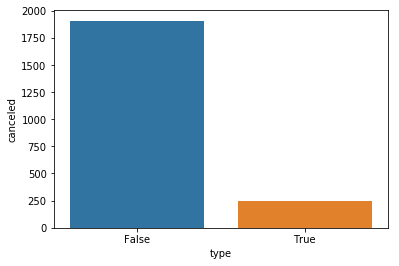

In [26]:
g = sns.barplot(x='type', y='canceled', data=canceled_counts)
plt.show()

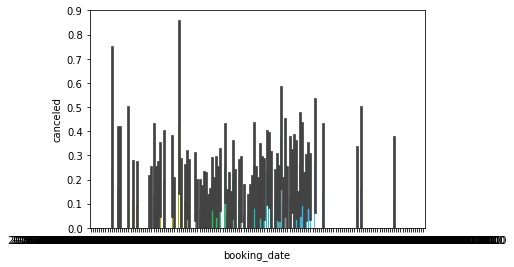

In [27]:
g = sns.barplot(y='canceled', x='booking_date', data=all_bookings)
plt.show()

In [28]:
all_bookings.sort_values('booking_date', inplace=True)

In [29]:
all_bookings.reset_index(drop=True)

,booking_date,cancel_date,canceled_by,code,days,service,staff,time,time_int,canceled
0,2018-03-14,NaT,NaN,JUNJ01,NaN,CON,JJ,3:50:00 PM,950.0,False
1,2018-03-14,NaT,NaN,NORJ01,NaN,SHCM,JJ,4:00:00 PM,960.0,False
2,2018-03-15,NaT,NaN,KERT01,NaN,SHCW,JJ,10:00:00 AM,600.0,False
3,2018-03-15,NaT,NaN,LEHJ01,NaN,SHCM,JJ,6:00:00 PM,1080.0,False
4,2018-03-15,NaT,NaN,SCHJ01,NaN,SHCM,JJ,12:00:00 PM,720.0,False
5,2018-03-15,NaT,NaN,SCHJ01,NaN,CCAMO,JJ,12:50:00 PM,770.0,False
6,2018-03-15,NaT,NaN,SCHJ02,NaN,SHCM,JJ,3:20:00 PM,920.0,False
7,2018-03-15,NaT,NaN,THOD01,NaN,SHCM,JJ,1:10:00 PM,790.0,False
8,2018-03-15,NaT,NaN,CORS01,NaN,SHCW,JJ,2:10:00 PM,850.0,False
9,2018-03-16,NaT,NaN,CHEW01,NaN,SHCW,JJ,10:00:00 AM,600.0,False


In [30]:
bookings_q2 = all_bookings.loc[(all_bookings.booking_date > '2018-03-31') & (all_bookings.booking_date < '2018-07-01'),]

In [31]:
bookings_q2.tail()

,booking_date,cancel_date,canceled_by,code,days,service,staff,time,time_int,canceled
1508,2018-06-30,NaT,NaN,GOSD01,NaN,CHLPL,JOANNE,10:00:00 AM,600.0,False
1509,2018-06-30,NaT,NaN,HAMA01,NaN,SHCW,KELLY,10:00:00 AM,600.0,False
1510,2018-06-30,NaT,NaN,IRWE01,NaN,CTU,JOANNE,9:00:00 AM,540.0,False
98,2018-06-30,2018-06-28,BECKY,HELJ01,2.0,SHCM,BECKY,NaN,NaN,True
1505,2018-06-30,NaT,NaN,EZIR01,NaN,SHCW,JJ,11:00:00 AM,660.0,False


In [32]:
bookings_q2.reset_index(drop=True, inplace=True)
bookings_q2.head(10)

,booking_date,cancel_date,canceled_by,code,days,service,staff,time,time_int,canceled
0,2018-04-01,NaT,NaN,SLEA01,NaN,CON,HOUSE,11:10:00 AM,670.0,False
1,2018-04-03,NaT,NaN,THOW01,NaN,SBD,JJ,9:00:00 AM,540.0,False
2,2018-04-03,2018-05-10,JJ,KOOM01,-37.0,SHCW,JJ,NaN,NaN,True
3,2018-04-03,NaT,NaN,YATT01,NaN,SHCM,BECKY,11:00:00 AM,660.0,False
4,2018-04-03,2018-04-03,JJ,HILJ01,0.0,CFC,KELLY,NaN,NaN,True
5,2018-04-03,NaT,NaN,WONM02,NaN,SBD,JJ,8:00:00 AM,480.0,False
6,2018-04-03,NaT,NaN,SKUD01,NaN,SBD5+1,BECKY,10:00:00 AM,600.0,False
7,2018-04-03,NaT,NaN,DANJ01,NaN,SBD,SINEAD,4:00:00 PM,960.0,False
8,2018-04-03,NaT,NaN,LINJ01,NaN,SHCW,JJ,10:00:00 AM,600.0,False
9,2018-04-03,NaT,NaN,NICP01,NaN,SHCM,BECKY,3:30:00 PM,930.0,False


In [33]:
q2_count_canceled = bookings_q2.canceled.value_counts().to_frame()
q2_count_canceled

,canceled
False,1229
True,148


In [34]:
q2_count_canceled['status'] = ['attended', 'canceled']
q2_count_canceled.columns = ['count', 'status']
q2_count_canceled.reset_index(drop=True, inplace=True)
q2_count_canceled

,count,status
0,1229,attended
1,148,canceled


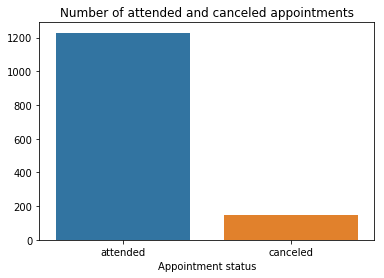

In [35]:
g = sns.barplot(x='status', y='count', data=q2_count_canceled)
g.set_xlabel('Appointment status')
g.set_ylabel('')
plt.title('Number of attended and canceled appointments')
plt.show()

In [36]:
service_temp_1 = bookings_q2.groupby('service').aggregate(sum)
service_temp_1 = service_temp_1.reset_index()
service_temp_1

,service,days,time_int,canceled
0,CAL,0.0,720.0,0.0
1,CALC,0.0,16520.0,0.0
2,CAS,0.0,840.0,0.0
3,CBAL,6.0,7910.0,7.0
4,CCAMO,4.0,7000.0,3.0
5,CCO,0.0,0.0,1.0
6,CDPB,7.0,5340.0,3.0
7,CFC,22.0,28900.0,11.0
8,CHLFH,2.0,6520.0,2.0
9,CHLFHC,0.0,640.0,0.0


In [37]:
service_temp = bookings_q2.service.value_counts().to_frame()
service_temp = service_temp.reset_index()
service_temp.columns = ['service', 'count']
service_temp

,service,count
0,SHCW,520
1,SHCM,277
2,SBD,236
3,CTU,64
4,CFC,47
5,CON,41
6,CHLPL,28
7,CALC,22
8,SBD5+1,17
9,CBAL,17


In [38]:
q2_service = pd.merge(service_temp_1, service_temp, left_on='service', right_on='service')
q2_service

,service,days,time_int,canceled,count
0,CAL,0.0,720.0,0.0,1
1,CALC,0.0,16520.0,0.0,22
2,CAS,0.0,840.0,0.0,1
3,CBAL,6.0,7910.0,7.0,17
4,CCAMO,4.0,7000.0,3.0,12
5,CCO,0.0,0.0,1.0,1
6,CDPB,7.0,5340.0,3.0,10
7,CFC,22.0,28900.0,11.0,47
8,CHLFH,2.0,6520.0,2.0,11
9,CHLFHC,0.0,640.0,0.0,1


In [39]:
q2_service['prop_canceled'] = q2_service['canceled'] / q2_service['count']
q2_service.head()

,service,days,time_int,canceled,count,prop_canceled
0,CAL,0.0,720.0,0.0,1,0.000000
1,CALC,0.0,16520.0,0.0,22,0.000000
2,CAS,0.0,840.0,0.0,1,0.000000
3,CBAL,6.0,7910.0,7.0,17,0.411765
4,CCAMO,4.0,7000.0,3.0,12,0.250000


In [40]:
q2_service['attended'] = q2_service['count'] - q2_service['canceled']

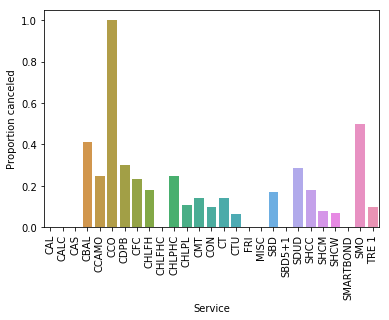

In [41]:
g = sns.barplot(x='service', y='prop_canceled', data=q2_service)
g.set_ylabel('Proportion canceled')
g.set_xlabel('Service')
plt.xticks(rotation='vertical')
plt.show()

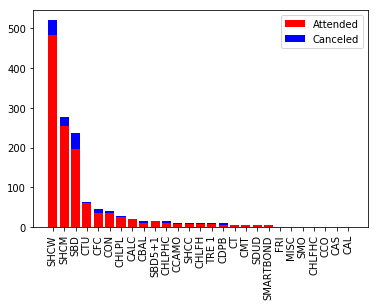

In [42]:
q2_service.sort_values('count', inplace=True, ascending=False)
p1 = plt.bar(x=q2_service['service'], height=(q2_service['count'] - q2_service['canceled']), color='red')
p2 = plt.bar(x='service', height='canceled', color='blue', data=q2_service, bottom=(q2_service['count'] - q2_service['canceled']))
plt.xticks(rotation='vertical')
plt.legend(['Attended', 'Canceled'])
plt.show()

In [43]:
top3_services = ['SHCW', 'SHCM', 'SBD']
q2_service_nottop3 = q2_service[~q2_service.service.isin(top3_services)]

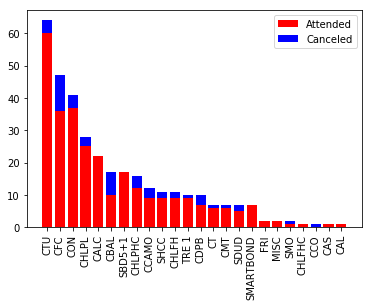

In [44]:
p1 = plt.bar(x=q2_service_nottop3['service'], height=(q2_service_nottop3['count'] - q2_service_nottop3['canceled']), color='red')
p2 = plt.bar(x=q2_service_nottop3['service'], height=q2_service_nottop3['canceled'], color='blue', bottom=(q2_service_nottop3['count'] - q2_service_nottop3['canceled']))
plt.legend(['Attended', 'Canceled'])
plt.xticks(rotation='vertical')
plt.show()

In [45]:
q2_service_long = pd.melt(q2_service, id_vars=['service'], value_vars=['canceled', 'attended'], var_name = 'status')
q2_service_long.tail()

,service,status,value
49,SMO,attended,1.0
50,CHLFHC,attended,1.0
51,CCO,attended,0.0
52,CAS,attended,1.0
53,CAL,attended,1.0


In [73]:
test = q2_service_long.groupby(['status', 'service']).agg('sum').unstack(1)

ValueError: too many values to unpack (expected 2)

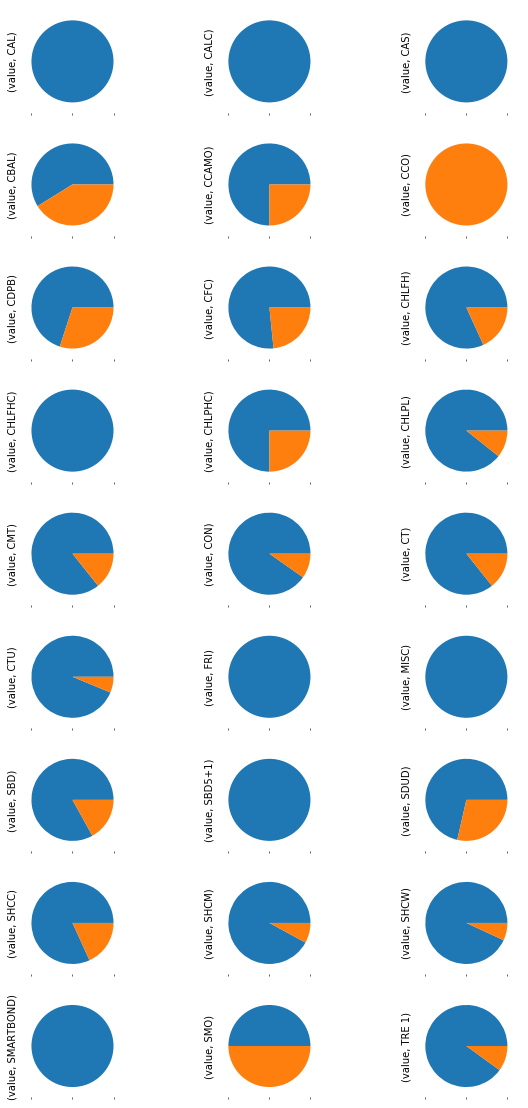

In [85]:
test.plot(kind='pie', subplots=True, 
          layout=(9, 3), legend=False, figsize=(10, 20),
          labels=None)

plt.figlegend(labels=['Canceled', 'Attended'], loc='center right')
plt.show()

In [47]:
q2_cancel_by_date = bookings_q2.groupby('booking_date')['canceled'].agg('sum').to_frame()
q2_cancel_by_date.head()

,canceled
booking_date,
2018-04-01,0.0
2018-04-03,2.0
2018-04-04,2.0
2018-04-05,0.0
2018-04-06,0.0


In [48]:
q2_cancel_by_date.reset_index(inplace=True)
q2_cancel_by_date.head()

,booking_date,canceled
0,2018-04-01,0.0
1,2018-04-03,2.0
2,2018-04-04,2.0
3,2018-04-05,0.0
4,2018-04-06,0.0


In [49]:
q2_booking_by_date = bookings_q2.booking_date.value_counts().to_frame()

In [50]:
q2_booking_by_date.head()

,booking_date
2018-05-31,41
2018-06-02,40
2018-05-29,38
2018-06-15,34
2018-05-26,31


In [51]:
q2_booking_by_date.reset_index(inplace=True)
q2_booking_by_date.columns = ['booking_date', 'appointments']
q2_booking_by_date.sort_values('booking_date', inplace=True)
q2_booking_by_date.head()

,booking_date,appointments
72,2018-04-01,1
55,2018-04-03,12
56,2018-04-04,12
44,2018-04-05,16
45,2018-04-06,16


In [52]:
q2_booking_counts = pd.merge(q2_cancel_by_date, q2_booking_by_date, on='booking_date')
q2_booking_counts.tail()

,booking_date,canceled,appointments
68,2018-06-26,2.0,24
69,2018-06-27,4.0,23
70,2018-06-28,3.0,24
71,2018-06-29,4.0,28
72,2018-06-30,7.0,30


In [53]:
q2_booking_counts.sort_values('booking_date', inplace=True)
q2_booking_counts.head()

,booking_date,canceled,appointments
0,2018-04-01,0.0,1
1,2018-04-03,2.0,12
2,2018-04-04,2.0,12
3,2018-04-05,0.0,16
4,2018-04-06,0.0,16


In [54]:
q2_booking_counts_long = pd.melt(q2_booking_counts, id_vars='booking_date', var_name='bookings')
q2_booking_counts_long.head()

,booking_date,bookings,value
0,2018-04-01,canceled,0.0
1,2018-04-03,canceled,2.0
2,2018-04-04,canceled,2.0
3,2018-04-05,canceled,0.0
4,2018-04-06,canceled,0.0


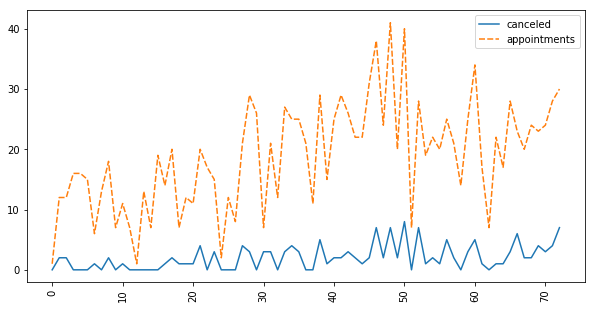

In [72]:
fig, ax = plt.subplots(figsize=(10, 5))
g = sns.lineplot(data = [q2_booking_counts.canceled, q2_booking_counts.appointments])
plt.xticks(rotation='vertical')
plt.show()

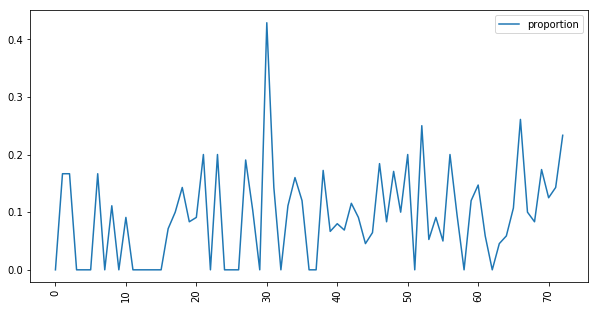

In [56]:
q2_booking_counts['proportion'] = q2_booking_counts['canceled'] / q2_booking_counts['appointments']

plt.figure(figsize=(10, 5))
sns.lineplot(data=[q2_booking_counts.proportion])
plt.xticks(rotation='vertical')
plt.show()

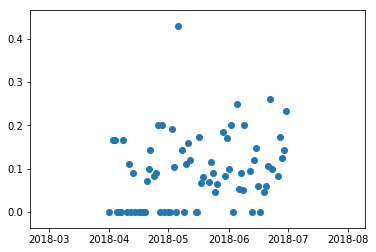

In [57]:
plt.scatter(x='booking_date', y='proportion', data=q2_booking_counts)
plt.show()

In [58]:
q2_booking_counts.head()


,booking_date,canceled,appointments,proportion
0,2018-04-01,0.0,1,0.000000
1,2018-04-03,2.0,12,0.166667
2,2018-04-04,2.0,12,0.166667
3,2018-04-05,0.0,16,0.000000
4,2018-04-06,0.0,16,0.000000


In [64]:
q2_booking_counts['day'] = (q2_booking_counts.index +1)
q2_booking_counts.head()

,booking_date,canceled,appointments,proportion,day
0,2018-04-01,0.0,1,0.000000,1
1,2018-04-03,2.0,12,0.166667,2
2,2018-04-04,2.0,12,0.166667,3
3,2018-04-05,0.0,16,0.000000,4
4,2018-04-06,0.0,16,0.000000,5


In [67]:
type(q2_booking_counts['day'][1])

numpy.int64

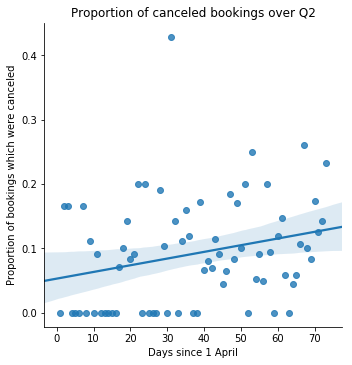

In [69]:
sns.lmplot(x='day', y='proportion', data=q2_booking_counts)
plt.xlabel('Days since 1 April')
plt.ylabel('Proportion of bookings which were canceled')
plt.title('Proportion of canceled bookings over Q2')
plt.show()

In [86]:
bookings_q2.head()

,booking_date,cancel_date,canceled_by,code,days,service,staff,time,time_int,canceled
0,2018-04-01,NaT,NaN,SLEA01,NaN,CON,HOUSE,11:10:00 AM,670.0,False
1,2018-04-03,NaT,NaN,THOW01,NaN,SBD,JJ,9:00:00 AM,540.0,False
2,2018-04-03,2018-05-10,JJ,KOOM01,-37.0,SHCW,JJ,NaN,NaN,True
3,2018-04-03,NaT,NaN,YATT01,NaN,SHCM,BECKY,11:00:00 AM,660.0,False
4,2018-04-03,2018-04-03,JJ,HILJ01,0.0,CFC,KELLY,NaN,NaN,True


In [96]:
q2_notice = bookings_q2.days.value_counts().to_frame()
q2_notice.reset_index(inplace=True)
q2_notice.columns = ['days_notice', 'count']
q2_notice.sort_values('days_notice', inplace=True)
q2_notice = q2_notice[q2_notice.days_notice >= 0]
q2_notice.days_notice = q2_notice.days_notice.astype(int)
q2_notice.head()

,days_notice,count
0,0,47
1,1,26
2,2,14
3,3,9
5,4,7


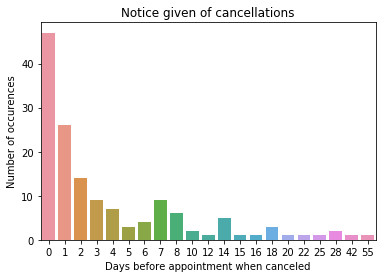

In [99]:
g = sns.barplot(x='days_notice', y='count', data=q2_notice)
g.set_xlabel("Days before appointment when canceled")
g.set_ylabel('Number of occurences')
g.set_title('Notice given of cancellations')
plt.show()